In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps
import scipy as sp


# Zadanie 1

In [2]:
def gen_X_t(sigma_z, sigma_w, fi, n):
    z_t = np.random.normal(0,sigma_z, n + 1)
    z_t = z_t[1:] + fi*z_t[:n]
    w_t = np.random.normal(0,sigma_w, n)
    return z_t + w_t

def emp_kow(X_t, h):
    n = len(X_t)
    mu = np.mean(X_t)
    suma = 0
    for i in range(n-abs(h)):
        suma += (X_t[i]-mu)*(X_t[i+abs(h)] - mu)
    return 1/n*suma

def emp_kor(X_t ,h):
    return emp_kow(X_t,h)/emp_kow(X_t,0)


def autokow(sigma_z, sigma_w,fi,h):
    if h == 0:
        return sigma_w**2 + (sigma_z**2)*(1+fi**2)
    elif h==1 or h ==-1:
        return (sigma_z**2)*fi
    else:
        return 0  
    
def autokor(sigma_z, sigma_w,fi,h):
    if h == 0:
        return 1
    elif h==1 or h ==-1:
        return autokow(sigma_z,sigma_w,fi,h)/autokow(sigma_z,sigma_w,fi,0)
    else:
        return 0  


In [3]:
n = 1000
fi = 2
sigma_z = 1
sigma_w = 0.5
h_values = np.arange(0,11,1)
kow_emp = np.zeros(len(h_values))
kow = np.zeros(len(h_values))
kor_emp = np.zeros(len(h_values))
kor = np.zeros(len(h_values))

X_t = gen_X_t(sigma_z,sigma_w,fi,n)

for i in range(len(h_values)):
    kow[i] = autokow(sigma_z,sigma_w,fi,h_values[i])
    kor[i] = autokor(sigma_z,sigma_w,fi,h_values[i])
    kow_emp[i] = emp_kow(X_t,h_values[i])
    kor_emp[i] = emp_kor(X_t,h_values[i])


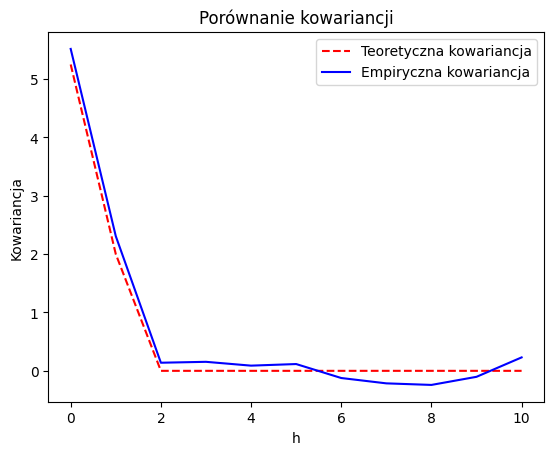

In [4]:
plt.plot(h_values, kow, 'r--', label='Teoretyczna kowariancja')
plt.plot(h_values, kow_emp, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie kowariancji')
plt.legend()

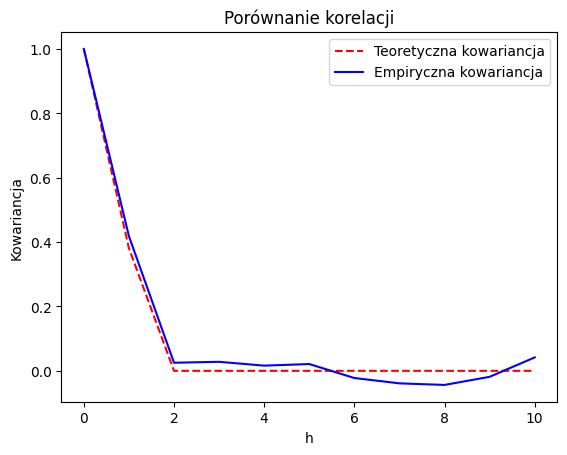

In [5]:
plt.plot(h_values, kor, 'r--', label='Teoretyczna kowariancja')
plt.plot(h_values, kor_emp, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie korelacji')
plt.legend()

# Zadanie 4


In [6]:
def m(a_1, a_2, t):
    return a_1*t + a_2

def s(t,b_1,b_2):
    return b_1*np.sin(b_2*t)

def gen_Y_t(sigma_z, teta, n):
    z_t = np.random.normal(0,sigma_z, n + 1)
    z_t = z_t[1:] + teta*z_t[:n]
    return z_t

def teo_kow(sigma_z,teta, h):
    if h==0:
        return (sigma_z**2) * (teta**2) + (sigma_z**2) 
    elif h== 1 or h==-1:
        return (sigma_z**2) * teta
    else:
        return 0

#scipy optimize -metoda najmniejszych kwadratów 

In [7]:
n=1000
t_values = np.linspace(0.01,10,n)
a_1 = 1.5
a_2 = 5
b_1 = 2
b_2 = 3
teta = 0.5
sigma_z = 1

X_t = m(a_1,a_2,t_values) + s(t_values,b_1,b_2) + gen_Y_t(sigma_z,teta,n)

a_1_emp, a_2_emp = np.polyfit(t_values, X_t,1)

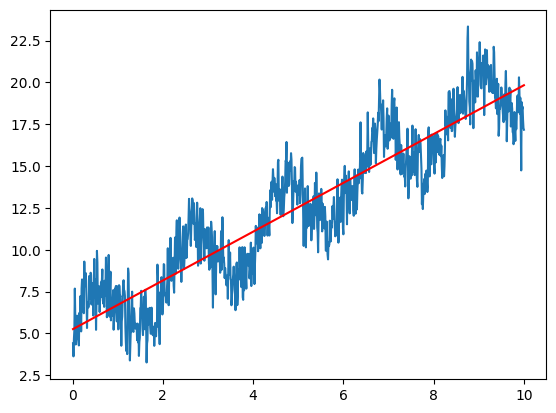

In [8]:
plt.plot(np.linspace(0.01,10,n),X_t)
plt.plot(np.linspace(0.01,10,n),a_1_emp*t_values + a_2_emp, color="red")

In [9]:
a_1_emp, a_2_emp = np.polyfit(t_values, X_t,1)
X_t_q = X_t -a_1_emp*t_values - a_2_emp

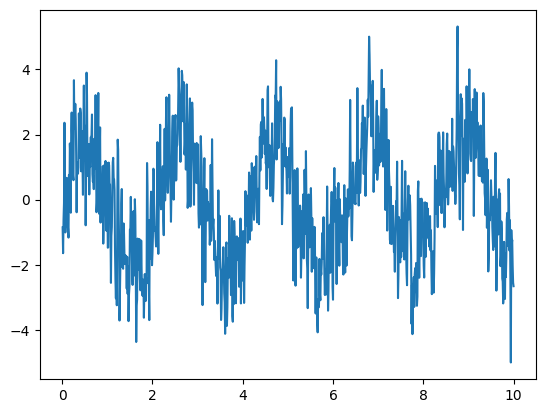

In [10]:
plt.plot(np.linspace(0.01,10,n),X_t_q)

In [11]:
n,m= sp.optimize.curve_fit(s,t_values, X_t_q, p0 = [np.max(X_t_q),np.pi] )
print(n)
b_1_emp, b_2_emp = n
X_t_qq = X_t_q - b_1_emp*np.sin(b_2_emp*t_values)


[1.98273722 2.99373855]


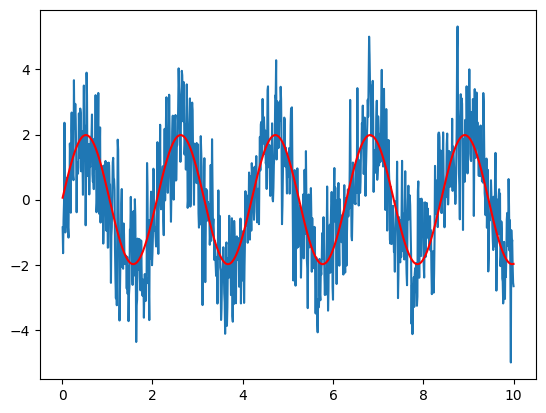

In [12]:
plt.plot(t_values, X_t_q)
plt.plot(t_values, b_1_emp*np.sin(b_2_emp*t_values), color="red")

In [13]:
X_t_qq = X_t_q-b_1_emp*np.sin(b_2_emp*t_values)

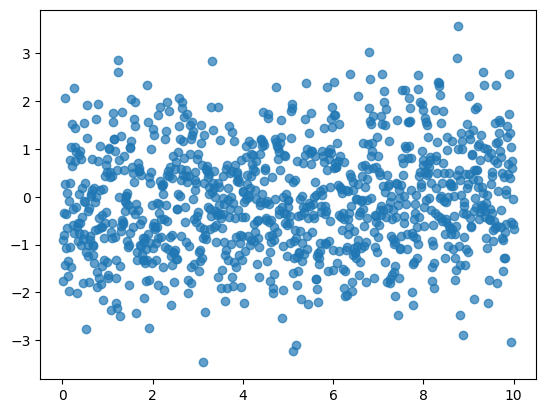

In [18]:
plt.scatter(t_values, X_t_qq,alpha=0.7)

In [15]:
h_values = np.arange(0,11,1)
kow_emp = np.zeros(len(h_values))
kow_teo = np.zeros(len(h_values))
for i in range(len(h_values)):
    kow_emp[i] = emp_kow(X_t_qq,h_values[i])
    kow_teo[i] = teo_kow(sigma_z,teta,h_values[i])

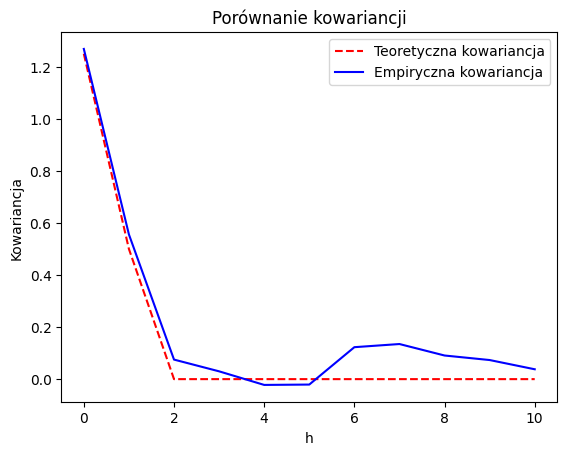

In [16]:
plt.plot(h_values, kow_teo, 'r--', label='Teoretyczna kowariancja')
plt.plot(h_values, kow_emp, 'b-', label='Empiryczna kowariancja')
plt.xlabel('h')
plt.ylabel('Kowariancja')
plt.title('Porównanie kowariancji')
plt.legend()